**Julius Nillo** <br>
<br>

Dataset used: Wine Quality Data Set (use white wine data) <br>

Task: Regression <br>

Target Value: alcohol <br>

In [ ]:
# using this google colab reference to clarify the version I am using for pycaret
# https://colab.research.google.com/drive/12Uy1fTJy4XQDMdXVM_5XJ0iGEdCDOgYf#scrollTo=H80WJWdPFLFL
# from this stack overflow link https://stackoverflow.com/questions/76837647/how-to-downgrade-python-version-to-3-9-in-colab-without-creating-virtual-environ
import sys
print("version:", sys.version)

version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [ ]:
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -q wine+quality.zip

In [ ]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pmdarima to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 6.5 

# Quick Start

In [ ]:
import pandas
import pandas as pd
white = pd.read_csv('winequality-white.csv', sep=";")
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
from pycaret.regression import *
s = setup(white, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# init setup on exp
exp.setup(white, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(4898, 12)"
4,Transformed data shape,"(4898, 12)"
5,Transformed train set shape,"(3428, 12)"
6,Transformed test set shape,"(1470, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2440,0.1098,0.3304,0.9265,0.0286,0.0232,0.2910
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.1320
rf,Random Forest Regressor,0.2449,0.1242,0.3510,0.9167,0.0302,0.0231,1.0960
et,Extra Trees Regressor,0.2261,0.1252,0.3522,0.9160,0.0303,0.0213,0.5030
gbr,Gradient Boosting Regressor,0.2969,0.1538,0.3913,0.8967,0.0339,0.0284,0.4300
dt,Decision Tree Regressor,0.3049,0.2404,0.4888,0.8389,0.0420,0.0288,0.0320
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.7030
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0200
ada,AdaBoost Regressor,0.4811,0.3440,0.5863,0.7692,0.0518,0.0471,0.1870
ridge,Ridge Regression,0.6974,0.7636,0.8729,0.4892,0.0752,0.0664,0.0210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# compare baseline models based on RMSE
best_rmse = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2440,0.1098,0.3304,0.9265,0.0286,0.0232,0.4940
xgboost,Extreme Gradient Boosting,0.2285,0.1147,0.3375,0.9233,0.0291,0.0216,0.3730
rf,Random Forest Regressor,0.2449,0.1242,0.3510,0.9167,0.0302,0.0231,1.9650
et,Extra Trees Regressor,0.2261,0.1252,0.3522,0.9160,0.0303,0.0213,0.9370
gbr,Gradient Boosting Regressor,0.2969,0.1538,0.3913,0.8967,0.0339,0.0284,0.5190
lr,Linear Regression,0.3044,0.2410,0.4514,0.8337,0.0355,0.0293,0.0270
br,Bayesian Ridge,0.3045,0.2410,0.4516,0.8337,0.0355,0.0293,0.0260
dt,Decision Tree Regressor,0.3049,0.2404,0.4888,0.8389,0.0420,0.0288,0.0450
ada,AdaBoost Regressor,0.4811,0.3440,0.5863,0.7692,0.0518,0.0471,0.3520
ridge,Ridge Regression,0.6974,0.7636,0.8729,0.4892,0.0752,0.0664,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

<h1> LightGBM </h1>

In [ ]:
best = create_model('lightgbm', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

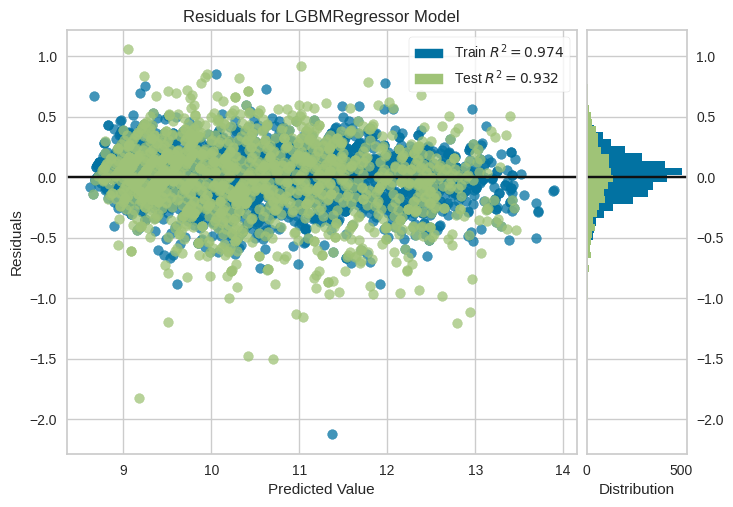

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

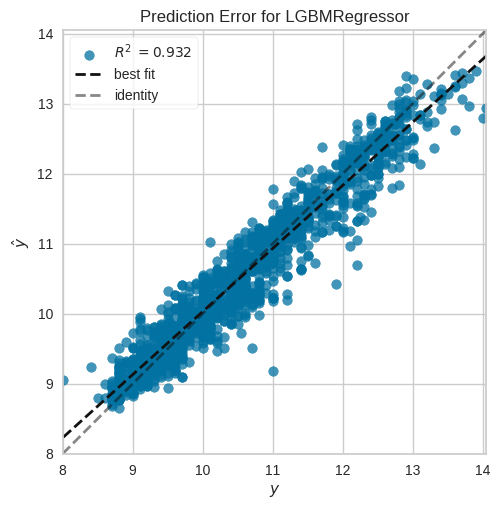

In [ ]:
# plot error
plot_model(best, plot = 'error')

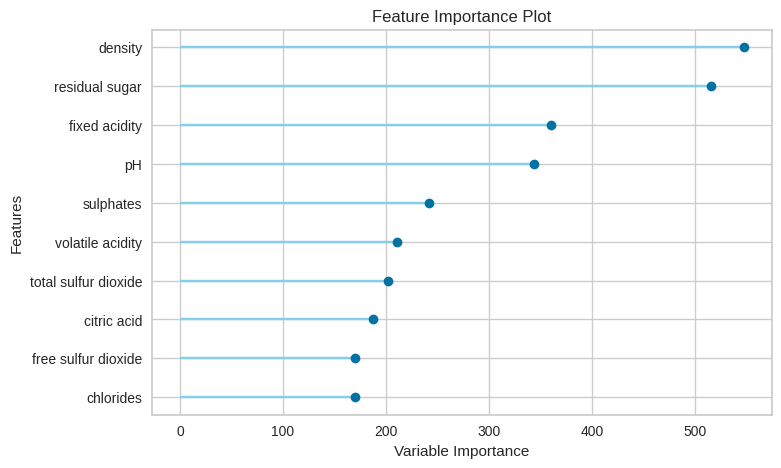

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2404,0.1029,0.3208,0.9324,0.0275,0.0227


In [ ]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
1088,7.4,0.20,0.37,16.950001,0.048,43.0,190.0,0.99950,3.03,0.42,6,9.2,9.048797
4366,5.9,0.29,0.28,3.200000,0.035,16.0,117.0,0.98959,3.26,0.42,6,12.6,12.713655
92,6.9,0.24,0.33,1.700000,0.035,47.0,136.0,0.99000,3.26,0.40,7,12.6,12.628288
2901,6.5,0.22,0.32,2.200000,0.028,36.0,92.0,0.99076,3.27,0.59,7,11.9,11.720662
2330,7.5,0.38,0.29,12.700000,0.050,25.0,209.0,0.99860,3.25,0.59,6,9.3,9.400118


In [ ]:
# copy data and drop the target value (alcohol) for lightgbm

new_data = white.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,6,9.035915
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,6,9.678361
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,6,10.362477
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.935139
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.935139


<h1> Test and Training set (LightGBM) </h1>

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2363,0.0923,0.3038,0.9358,0.0263,0.0225
1,0.2631,0.1545,0.3930,0.8988,0.0332,0.0246
2,0.2489,0.1065,0.3264,0.9252,0.0281,0.0235
3,0.2532,0.1161,0.3407,0.9257,0.0292,0.0237
4,0.2474,0.1169,0.3419,0.9249,0.0295,0.0237
5,0.2420,0.1028,0.3206,0.9245,0.0279,0.0231
6,0.2457,0.1141,0.3377,0.9175,0.0300,0.0240
7,0.2333,0.1003,0.3167,0.9377,0.0273,0.0220
8,0.2305,0.0960,0.3098,0.9323,0.0272,0.0223


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

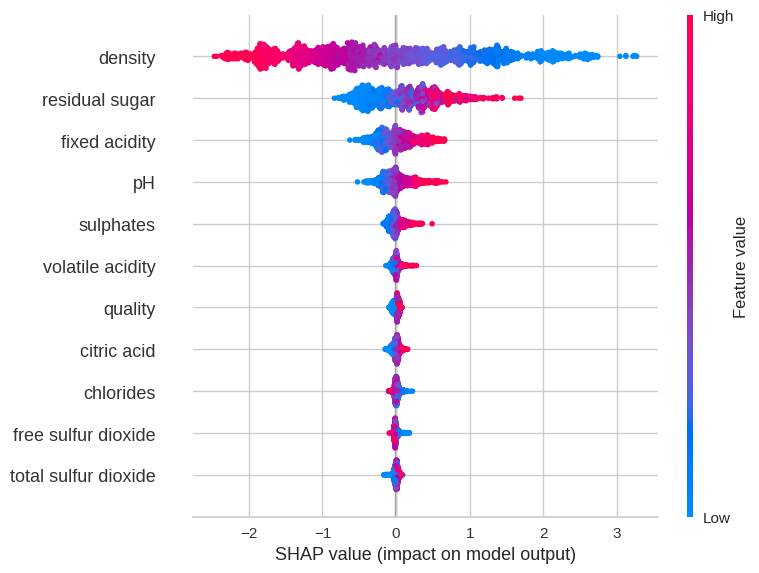

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

<h1> Test and Training set (Random Forest) </h1>

In [ ]:
random_forest = create_model('rf', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

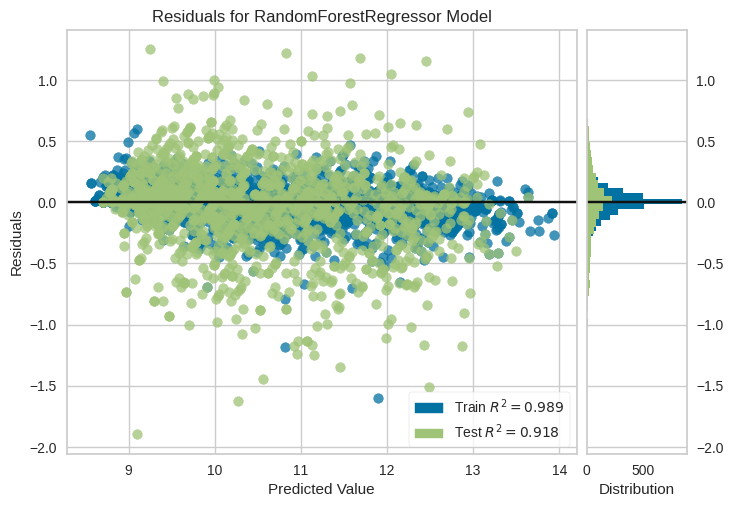

In [ ]:
# plot residuals
plot_model(random_forest, plot = 'residuals')

In [ ]:
holdout_pred_rf = predict_model(random_forest)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2471,0.1251,0.3538,0.9179,0.0302,0.0232


In [ ]:
# show predictions df
holdout_pred_rf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
1088,7.4,0.20,0.37,16.950001,0.048,43.0,190.0,0.99950,3.03,0.42,6,9.2,9.119
4366,5.9,0.29,0.28,3.200000,0.035,16.0,117.0,0.98959,3.26,0.42,6,12.6,12.723
92,6.9,0.24,0.33,1.700000,0.035,47.0,136.0,0.99000,3.26,0.40,7,12.6,12.505
2901,6.5,0.22,0.32,2.200000,0.028,36.0,92.0,0.99076,3.27,0.59,7,11.9,11.798
2330,7.5,0.38,0.29,12.700000,0.050,25.0,209.0,0.99860,3.25,0.59,6,9.3,9.284


In [ ]:
# copy data and drop the target value (alcohol) for random forest

new_data_rf = white.copy()
new_data_rf.drop('alcohol', axis=1, inplace=True)
new_data_rf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6


In [ ]:
predictions_rf = predict_model(random_forest, data = new_data_rf)
predictions_rf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,6,8.820
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,6,9.577
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,6,10.118
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.992
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.992


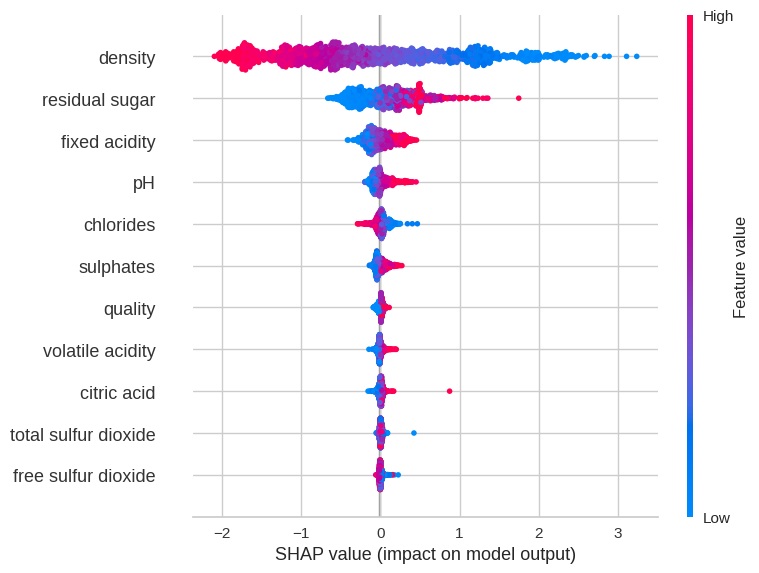

In [ ]:
# interpret summary model
interpret_model(random_forest, plot = 'summary')

<h1> Extreme Gradient Boosting </h1>

In [ ]:
extreme_gradient_boosting = create_model('xgboost', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

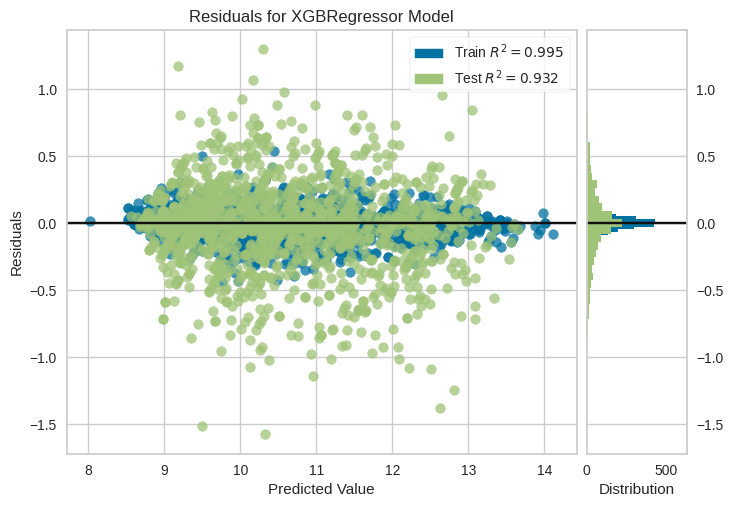

In [ ]:
plot_model(extreme_gradient_boosting, plot = 'residuals')

In [ ]:
holdout_pred_egb = predict_model(extreme_gradient_boosting)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2255,0.1042,0.3228,0.9316,0.0276,0.0212


In [ ]:
# show predictions df
holdout_pred_egb.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
1088,7.4,0.20,0.37,16.950001,0.048,43.0,190.0,0.99950,3.03,0.42,6,9.2,9.158050
4366,5.9,0.29,0.28,3.200000,0.035,16.0,117.0,0.98959,3.26,0.42,6,12.6,12.853150
92,6.9,0.24,0.33,1.700000,0.035,47.0,136.0,0.99000,3.26,0.40,7,12.6,12.647449
2901,6.5,0.22,0.32,2.200000,0.028,36.0,92.0,0.99076,3.27,0.59,7,11.9,11.655901
2330,7.5,0.38,0.29,12.700000,0.050,25.0,209.0,0.99860,3.25,0.59,6,9.3,9.389741


In [ ]:
# copy data and drop the target value (alcohol) for random forest

new_data_egb = white.copy()
new_data_egb.drop('alcohol', axis=1, inplace=True)
new_data_egb.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,6


In [ ]:
predictions_egb = predict_model(extreme_gradient_boosting, data = new_data_egb)
predictions_egb.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,6,8.804898
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,6,9.540968
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,6,10.141268
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.998676
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,6,9.998676


---

Based on the findings, let's try to optimize lightgbm. Since it is the highest accurate among the three models tested

In [ ]:
tuned_lightgbm = tune_model(best, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2855,0.1290,0.3592,0.9103,0.0309,0.0270
1,0.3032,0.1959,0.4426,0.8716,0.0376,0.0283
2,0.2868,0.1531,0.3912,0.8926,0.0338,0.0270
3,0.2794,0.1483,0.3851,0.9051,0.0330,0.0262
4,0.2926,0.1687,0.4107,0.8917,0.0357,0.0281
5,0.2913,0.1466,0.3828,0.8923,0.0332,0.0278
6,0.3093,0.1716,0.4142,0.8759,0.0366,0.0301
7,0.2728,0.1301,0.3607,0.9192,0.0312,0.0259
8,0.2682,0.1356,0.3682,0.9043,0.0323,0.0260


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
